Lesson on Logistic Regression and Decision Tree

Logistic Regression
Fit the logistic regression classifier to your training sample and transform, i.e. make predictions on the training sample
Evaluate your in-sample results using the model score, confusion matrix, and classification report.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
Look in the scikit-learn documentation to research the solver parameter. What is your best option(s) for the particular problem you are trying to solve and the data to be used?
Run through steps 2-4 using another solver (from question 5)
Which performs better on your in-sample data?
Save the best model in logit_fit

In [17]:
import graphviz
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data

In [18]:
df = prep_titanic_data(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode
0,0,0,3,male,0.271174,1,0,0.014151,S,Third,Southampton,0,3,1
1,1,1,1,female,0.472229,1,0,0.139136,C,First,Cherbourg,0,0,0
2,2,1,3,female,0.321438,0,0,0.015469,S,Third,Southampton,1,3,0
3,3,1,1,female,0.434531,1,0,0.103644,S,First,Southampton,0,3,0
4,4,0,3,male,0.434531,0,0,0.015713,S,Third,Southampton,1,3,1


In [19]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
605,3,0.447097,0.030352,1,0
197,3,0.522493,0.016404,0,1
56,2,0.258608,0.020495,0,0
645,1,0.597889,0.149765,1,0
356,1,0.271174,0.107353,0,1


In [20]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
passenger_id       712 non-null int64
survived           712 non-null int64
pclass             712 non-null int64
sex                712 non-null object
age                712 non-null float64
sibsp              712 non-null int64
parch              712 non-null int64
fare               712 non-null float64
embarked           712 non-null object
class              712 non-null object
embark_town        712 non-null object
alone              712 non-null int64
embarked_encode    712 non-null int64
sex_encode         712 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 83.4+ KB


Fit the model to the training data

In [22]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.14609353 -2.78233327  0.7509217  -0.32386279  0.21328412]]
Intercept: 
 [3.81756266]


Estimate whether or not a passenger would survive, using the training data

In [24]:
y_pred = logit.predict(X_train)

Estimate the probability of a passenger surviving, using the training data

In [25]:
y_pred_proba = logit.predict_proba(X_train)

Evaluate Model

In [26]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.70


Create a confusion matrix

In [27]:
print(confusion_matrix(y_train, y_pred))

[[200  99]
 [ 52 147]]


Compute Precision, Recall, F1-score, and Support

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,200,99
Actual +,52,147


In [31]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       299
           1       0.60      0.74      0.66       199

   micro avg       0.70      0.70      0.70       498
   macro avg       0.70      0.70      0.69       498
weighted avg       0.72      0.70      0.70       498



Visualize Model

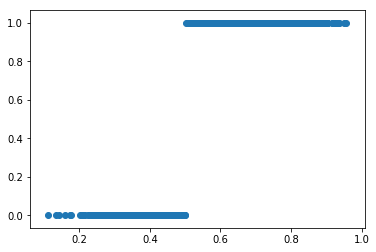

In [32]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)